# Tutorials for drawing diagrams
To understand the following 4 parts
1. **Diagrams**: a primary object representing a diagram
2. **Nodes**: a second object representing a node or system component
3. **Clusters**: group or clustering the nodes in a isolated group
4. **Edges**: an edge between Nodes

## 1. Diagrams
+ Basics
+ Jupyter Notebooks
+ Options

### Basic
Diagram represents a global diagram context.
You can create a diagram context with Diagram class. The first parameter of Diagram constructor will be used for output filename.

In [3]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("./imgs/Simple Diagram"):
    EC2("web")

### Jupyter Notebooks
Diagrams can be also rendered directly inside the notebook as like this:

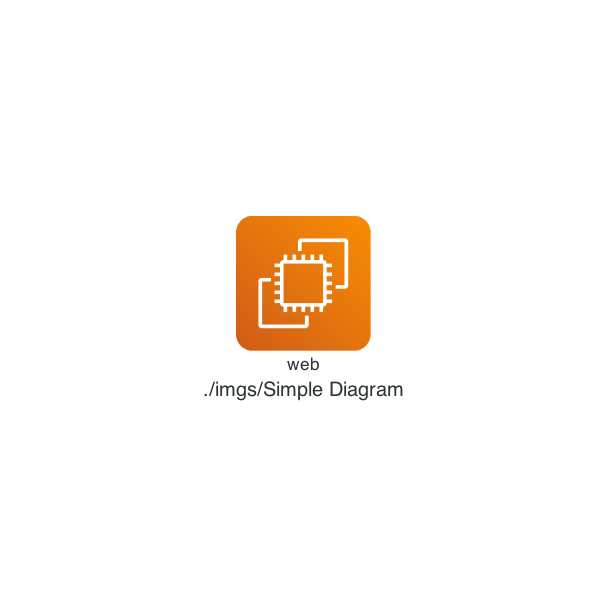

In [4]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("./imgs/Simple Diagram") as diag:
    EC2("web")
diag

### Options
> Can specify the output file format with **outformat** parameter. Default is **png**. <br/>
> png, jpg, svg, and pdf are allowd 

In [5]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("./imgs/Simple Diagram", outformat="jpg"):
    EC2("web")

> You can specify the output **filename** with filename parameter. The extension shouldn't be included, it's determined by the **outformat** parameter.

In [7]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("./imgs/Simple Diagram", filename="my_diagram"):
    EC2("web")

> You can also disable the automatic file opening by setting the **show** parameter as **false**. Default is **true**.

In [8]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("./imgs/Simple Diagram", show=False):
    EC2("web")

> It allows custom **Graphviz** dot attributes options.<br/>
> [reference link](https://www.graphviz.org/doc/info/attrs.html) 

In [9]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

graph_attr = {
    "fontsize": "45",
    "bgcolor": "transparent"
}

with Diagram("./imgs/Simple Diagram", show=False, graph_attr=graph_attr):
    EC2("web")

## 2. Nodes
+ Basic
+ Data Flow
+ Group Data Flow

### Basic
Node is an abstract concept that represents a single system component object.

A node object consists of three parts: **provider**, **resource type** and **name**. You may already have seen each part in the previous example.

e.g. the **EC2** is a node of compute **resource type** which provided by **aws** provider.

In [10]:
# aws resources
from diagrams.aws.compute import ECS, Lambda
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB, Route53, VPC
...

# azure resources
from diagrams.azure.compute import FunctionApps
from diagrams.azure.storage import BlobStorage
...

# alibaba cloud resources
from diagrams.alibabacloud.compute import ECS
from diagrams.alibabacloud.storage import ObjectTableStore
...

# gcp resources
from diagrams.gcp.compute import AppEngine, GKE
from diagrams.gcp.ml import AutoML 
...

# k8s resources
from diagrams.k8s.compute import Pod, StatefulSet
from diagrams.k8s.network import Service
from diagrams.k8s.storage import PV, PVC, StorageClass
...

# oracle resources
from diagrams.oci.compute import VirtualMachine, Container
from diagrams.oci.network import Firewall
from diagrams.oci.storage import FileStorage, StorageGateway

You can find all available nodes list in [here](https://diagrams.mingrammer.com/docs/nodes/aws)

### Data Flow
You can represent data flow by connecting the nodes with these operators: >>, << and -.

+ “ >>: Connect nodes in left to right direction. “
+ ” <<: Connect nodes in right to left direction. “
+ ” -: Connect nodes in no direction. Undirected. “

> Be careful when using the - and any shift operators together, which could cause unexpected results due to operator precedence.<br/>
> The order of rendered diagrams is the reverse of the declaration order.<br/>


In [11]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3

with Diagram("./imgs/Web Services", show=True):
    ELB("lb") >> EC2("web") >> RDS("userdb") >> S3("store")
    ELB("lb") >> EC2("web") >> RDS("userdb") << EC2("stat")
    (ELB("lb") >> EC2("web")) - EC2("web") >> RDS("userdb")

> You can change the data flow direction with direction parameter. Default is LR. (TB, BT, LR and RL) are allowed.

In [15]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("./imgs/Workers", show=True, direction="TB"):
    lb = ELB("lb")
    db = RDS("events")
    lb >> EC2("worker1") >> db
    lb >> EC2("worker2") >> db
    lb >> EC2("worker3") >> db
    lb >> EC2("worker4") >> db
    lb >> EC2("worker5") >> db

### Group Data Flow
Above worker example has too many redundant flows. In this case, you can group nodes into a list so that all nodes are connected to other nodes at once.

In [16]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

## 3. Clusters
+ Basics
+ Nested Clusters

### Basics
Cluster represents a local cluster context.

You can create a cluster context with Cluster class. And you can also connect the nodes in a cluster to other nodes outside a cluster.

In [17]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import RDS
from diagrams.aws.network import Route53

with Diagram("./imgs/Simple Web Service with DB Cluster", show=True):
    dns = Route53("dns")
    web = ECS("service")

    with Cluster("DB Cluster"):
        db_primary = RDS("primary")
        db_primary - [RDS("replica1"),
                     RDS("replica2")]

    dns >> web >> db_primary

### Nested Clusters

In [18]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("./imgs/Event Processing", show=True):
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

## 4. Edges
+ Basics

### Basics
Edge is an object representing a connection between Nodes with some additional properties.

An edge object contains three attributes: **label**, **color** and **style** which mirror corresponding graphviz edge attributes.

In [20]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="./imgs/Advanced Web Service with On-Premise (colored)", show=True):
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary \
            - Edge(color="brown", style="dashed") \
            - Redis("replica") \
            << Edge(label="collect") \
            << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary \
            - Edge(color="brown", style="dotted") \
            - PostgreSQL("replica") \
            << Edge(label="collect") \
            << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = Fluentd("logging")
    aggregator \
        >> Edge(label="parse") \
        >> Kafka("stream") \
        >> Edge(color="black", style="bold") \
        >> Spark("analytics")

    ingress \
        >> Edge(color="darkgreen") \
        << grpcsvc \
        >> Edge(color="darkorange") \
        >> aggregator